In [1]:
import requests
import json
from matplotlib import pyplot
import pandas as pd

In [2]:
url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_MONTHLY&symbol=BTC&market=GBP&apikey=IRPB4D473J4LLDWB"
res = requests.get(url)
content = res.content.decode("utf-8")

In [3]:
content

'{\n    "Meta Data": {\n        "1. Information": "Monthly Prices and Volumes for Digital Currency",\n        "2. Digital Currency Code": "BTC",\n        "3. Digital Currency Name": "Bitcoin",\n        "4. Market Code": "GBP",\n        "5. Market Name": "British Pound Sterling",\n        "6. Last Refreshed": "2023-02-15 00:00:00",\n        "7. Time Zone": "UTC"\n    },\n    "Time Series (Digital Currency Monthly)": {\n        "2023-02-15": {\n            "1a. open (GBP)": "19002.61307490",\n            "1b. open (USD)": "23125.13000000",\n            "2a. high (GBP)": "19931.06115000",\n            "2b. high (USD)": "24255.00000000",\n            "3a. low (GBP)": "17544.81475110",\n            "3b. low (USD)": "21351.07000000",\n            "4a. close (GBP)": "18185.50941480",\n            "4b. close (USD)": "22130.76000000",\n            "5. volume": "4032769.43109000",\n            "6. market cap (USD)": "4032769.43109000"\n        },\n        "2023-01-31": {\n            "1a. open (

In [4]:
jsoncontent = json.loads(content)

In [8]:
jsoncontent

{'Meta Data': {'1. Information': 'Monthly Prices and Volumes for Digital Currency',
  '2. Digital Currency Code': 'BTC',
  '3. Digital Currency Name': 'Bitcoin',
  '4. Market Code': 'GBP',
  '5. Market Name': 'British Pound Sterling',
  '6. Last Refreshed': '2023-02-15 00:00:00',
  '7. Time Zone': 'UTC'},
 'Time Series (Digital Currency Monthly)': {'2023-02-15': {'1a. open (GBP)': '19002.61307490',
   '1b. open (USD)': '23125.13000000',
   '2a. high (GBP)': '19931.06115000',
   '2b. high (USD)': '24255.00000000',
   '3a. low (GBP)': '17544.81475110',
   '3b. low (USD)': '21351.07000000',
   '4a. close (GBP)': '18185.50941480',
   '4b. close (USD)': '22130.76000000',
   '5. volume': '4032769.43109000',
   '6. market cap (USD)': '4032769.43109000'},
  '2023-01-31': {'1a. open (GBP)': '13592.86866210',
   '1b. open (USD)': '16541.77000000',
   '2a. high (GBP)': '19689.09453420',
   '2b. high (USD)': '23960.54000000',
   '3a. low (GBP)': '13557.73148730',
   '3b. low (USD)': '16499.0100000

In [44]:
months = []
highprices = []
lowprices = []

for month in jsoncontent["Time Series (Digital Currency Monthly)"]:
    highprice = float(jsoncontent["Time Series (Digital Currency Monthly)"][month]["2a. high (GBP)"])
    lowprice = float(jsoncontent["Time Series (Digital Currency Monthly)"][month]["3a. low (GBP)"])
    months.append(month)
    highprices.append(highprice)
    lowprices.append(lowprice)
months.reverse()
highprices.reverse()
lowprices.reverse()

In [45]:
highprices

[8529.5574,
 9403.87812,
 10245.32964,
 9902.5449705,
 11586.393,
 16322.1544668,
 24076.689,
 34471.5735,
 47950.246344,
 50819.07012,
 53292.47742,
 48892.935,
 33962.1009,
 34880.79504,
 41497.365,
 43485.9516,
 55055.91,
 56699.37,
 48526.0736415,
 39434.8227,
 37652.49033,
 39599.0372232,
 38986.2485103,
 32888.7325221,
 26281.3659381,
 20270.43564,
 20716.8979836,
 18734.62227,
 17326.17705,
 17651.2945245,
 15109.9301535,
 19689.0945342,
 19931.06115]

In [46]:
lowprices

[7258.34109,
 7307.6695419,
 8643.367005,
 8073.49725,
 8524.62702,
 10842.7684365,
 14439.7107309,
 23115.2649,
 26538.7235568,
 36937.1990169,
 38563.7889,
 24651.9,
 23669.93265,
 24058.61094,
 30677.399571,
 32540.508,
 35566.9642419,
 43762.5787872,
 34512.906519,
 27049.0261041,
 28203.6471444,
 30531.37815,
 30879.134286,
 21940.191,
 14480.52606,
 15432.91113,
 16040.1696,
 14894.6615454,
 14947.2687,
 12717.09348,
 13358.289399,
 13557.7314873,
 17544.8147511]

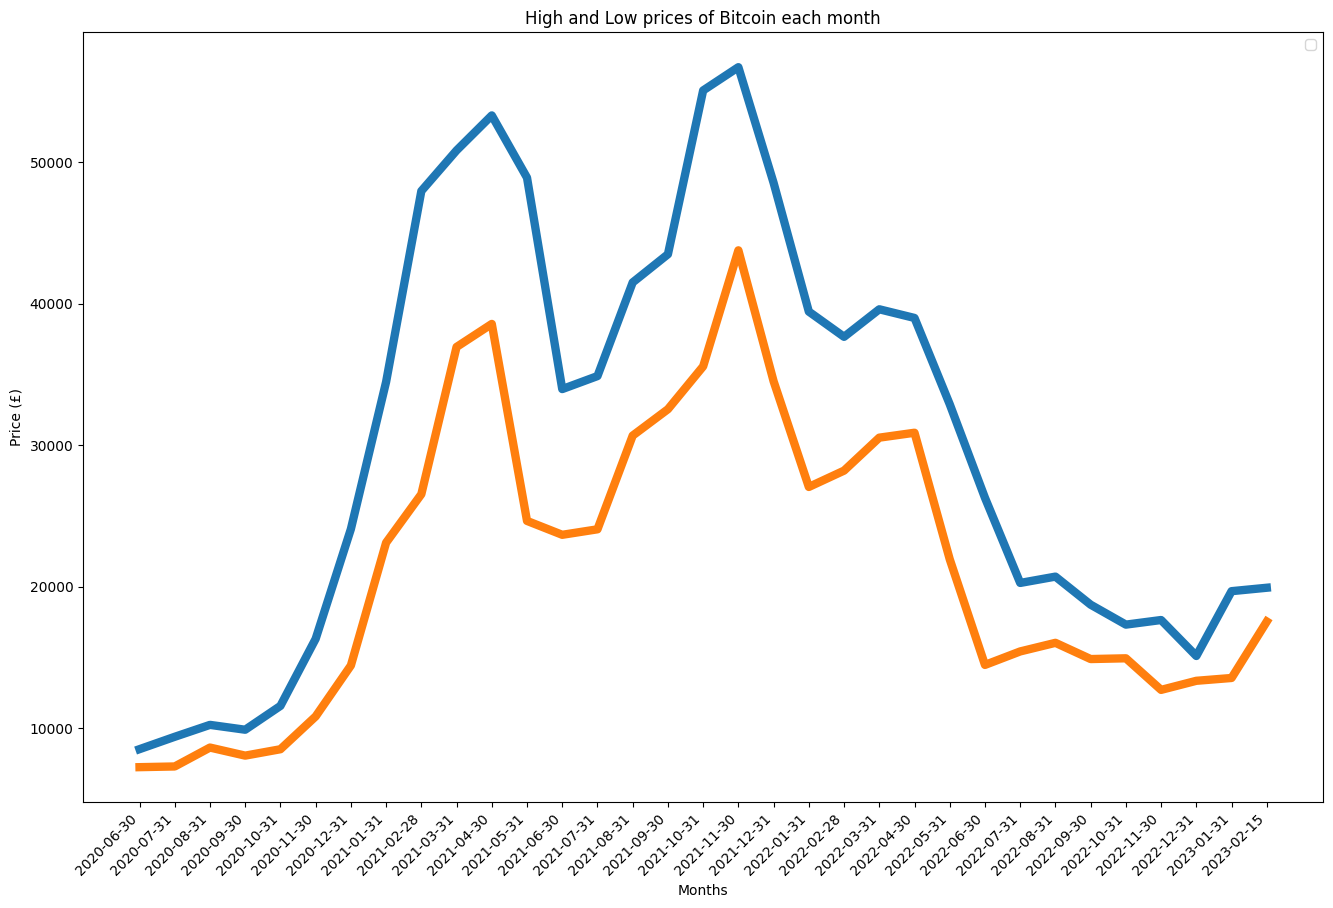

In [47]:
pyplot.rcParams["figure.figsize"] = [16, 10]
pyplot.rcParams["lines.linewidth"] = 6
pyplot.xticks(rotation = 45, ha=("right"))
pyplot.title("High and Low prices of Bitcoin each month")
pyplot.xlabel("Months")
pyplot.ylabel("Price (£)")
pyplot.legend(["High prices", "Low prices"])
pyplot.plot(months, highprices)
pyplot.plot(months, lowprices)

In [48]:
cols = [months, lowprices, highprices]
df = pd.DataFrame(cols).transpose()
df.columns = ["Month", "Low", "High"]

In [49]:
df

,Month,Low,High
0,2020-06-30,7258.34109,8529.5574
1,2020-07-31,7307.669542,9403.87812
2,2020-08-31,8643.367005,10245.32964
3,2020-09-30,8073.49725,9902.54497
4,2020-10-31,8524.62702,11586.393
5,2020-11-30,10842.768437,16322.154467
6,2020-12-31,14439.710731,24076.689
7,2021-01-31,23115.2649,34471.5735
8,2021-02-28,26538.723557,47950.246344
9,2021-03-31,36937.199017,50819.07012


In [50]:
df.shape

(33, 3)

In [51]:
df.describe()

,Month,Low,High
count,33,33.00000,33.0000
unique,33,33.00000,33.0000
top,2020-06-30,7258.34109,8529.5574
freq,1,1.00000,1.0000


In [38]:
df.dtypes

Month    object
Low      object
High     object
dtype: object

In [54]:
df["Low"] = df["Low"].astype(float)
df["High"] = df["High"].astype(float)

In [40]:
df.dtypes

Month     object
Low      float64
High     float64
dtype: object

In [55]:
df.describe()

,Low,High
count,33.000000,33.000000
mean,21553.412151,30420.382597
std,10306.541371,15145.366680
min,7258.341090,8529.557400
25%,13557.731487,17651.294525
50%,21940.191000,32888.732522
75%,30531.378150,41497.365000
max,43762.578787,56699.370000
